In [ ]:
!pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install 'networkx<2.7'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 61.8 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
def get_data(filename):
    # use a context manager to load in the data
    with open(filename, 'r', encoding='utf8') as rf:
        # transform file into string and split along new line
        lines = rf.read().split("\n")

        # separate each line along the tab characters
        data = [line.split("\t") for line in lines]

        # grab the header
        header = data[0]

        # delete header from data
        data = data[1:]

    # return header and data
    return header, data

In [ ]:
# load data in from file
node_header, node_data = get_data('nodes.tsv')
edge_header, edge_data = get_data('edges.tsv')

In [ ]:
# create graph object
G = nx.DiGraph()

# add node information to the graph
for node in node_data:
    # add nodes one by one, with id, name, chinese name, and index year
    G.add_node(int(node[1]), name=node[0])#, cname=node[2], indexyear=int(node[3]))

# add edge information to the graph
for edge in edge_data:
    # add edge one by one, node 1, node 2, kin, and label
    G.add_edge(int(edge[0]), int(edge[1]), label=edge[2])

# metrics
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

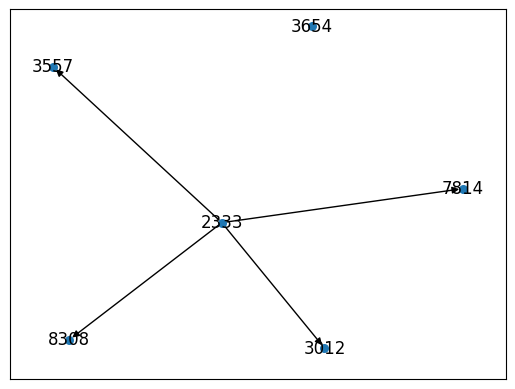

In [ ]:
nx.draw_networkx(G,with_labels = True, node_size = 30)
plt.show()

KeyError: ignored

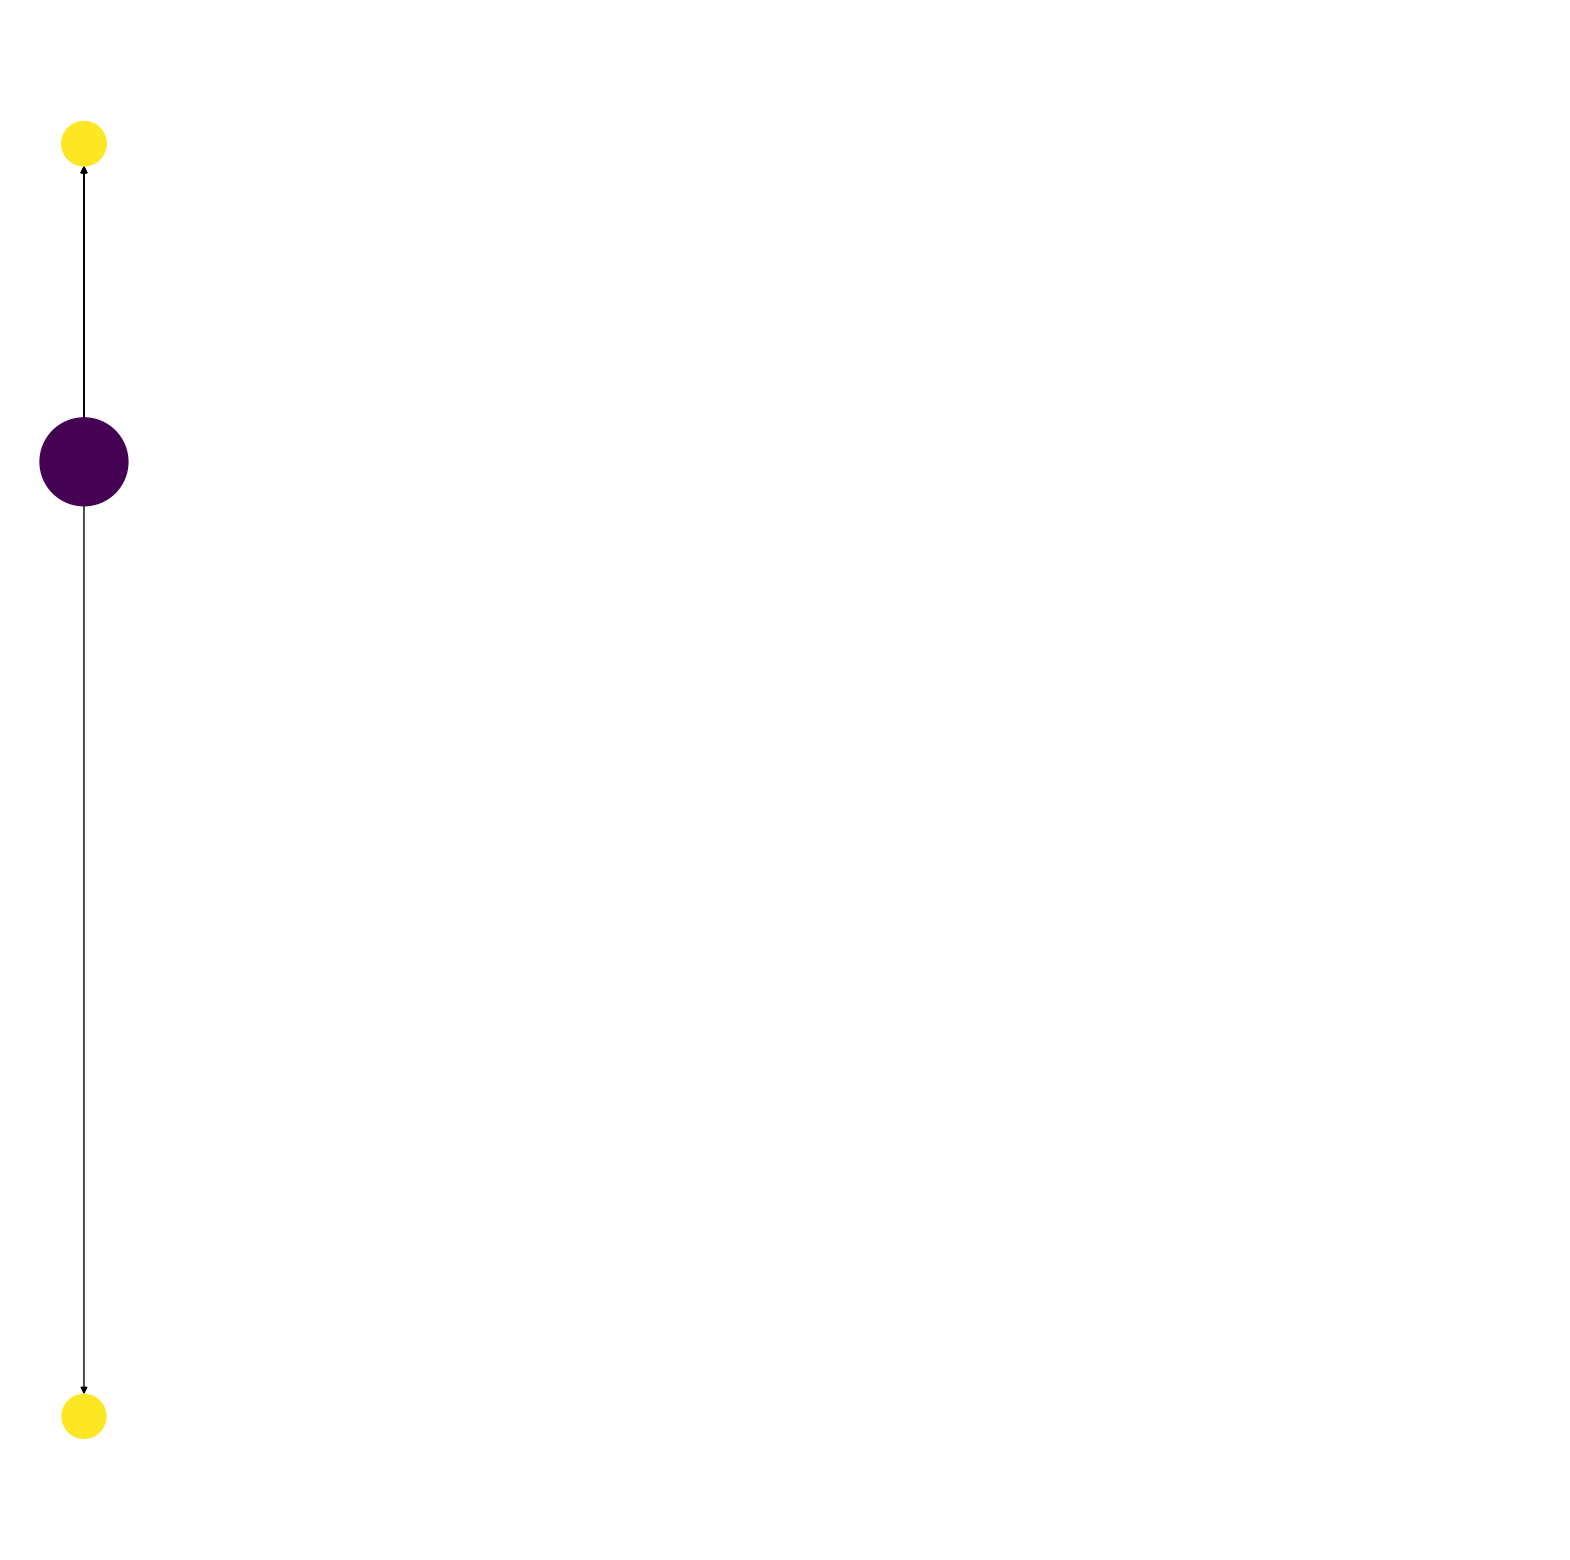

In [ ]:
# set node sizes based on degree centrality
node_sizes = [degree_centrality[node] * 5000 for node in G.nodes()]

# set node colors based on closeness centrality
node_colors = [closeness_centrality[node] for node in G.nodes()]

# set edge labels based on edge data
edge_labels = {(edge[0], edge[1]): edge[2] for edge in edge_data}


# visualize the graph using the spectral layout
fig = plt.figure(figsize=(20,20))
pos = nx.spectral_layout(G)
nx.draw(G, pos=pos, node_color=node_colors, node_size=node_sizes, with_labels=True, font_size=12, ax=plt.gca())

# add edge labels
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_size=10, font_color='red')

# add a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm._A = []
plt.colorbar(sm)

plt.show()

In [ ]:

# create graph object
G = nx.DiGraph()

# add node information to the graph
for node in node_data:
    # add nodes one by one, with id, name, chinese name, and index year
    G.add_node(int(node[1]), name=node[0])#, cname=node[2], indexyear=int(node[3]))

# create a set of unique edges
unique_edges = set((int(edge[0]), int(edge[1])) for edge in edge_data)

# create a new edge_data list with unique edges and highest frequency labels
edge_data_new = []
for edge in unique_edges:
    labels = [edge[2] for edge in edge_data if edge[0] == str(edge[0]) and edge[1] == str(edge[1])]
    label_freq = {label: labels.count(label) for label in labels}
    label_max = max(label_freq, key=label_freq.get)
    edge_data_new.append([edge[0], edge[1], label_max])

# add edge information to the graph
for edge in edge_data_new:
    # add edge one by one, node 1, node 2, kin, and label
    G.add_edge(edge[0], edge[1], label=edge[2])

# metrics
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)


<ipython-input-19-205954f64beb>:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


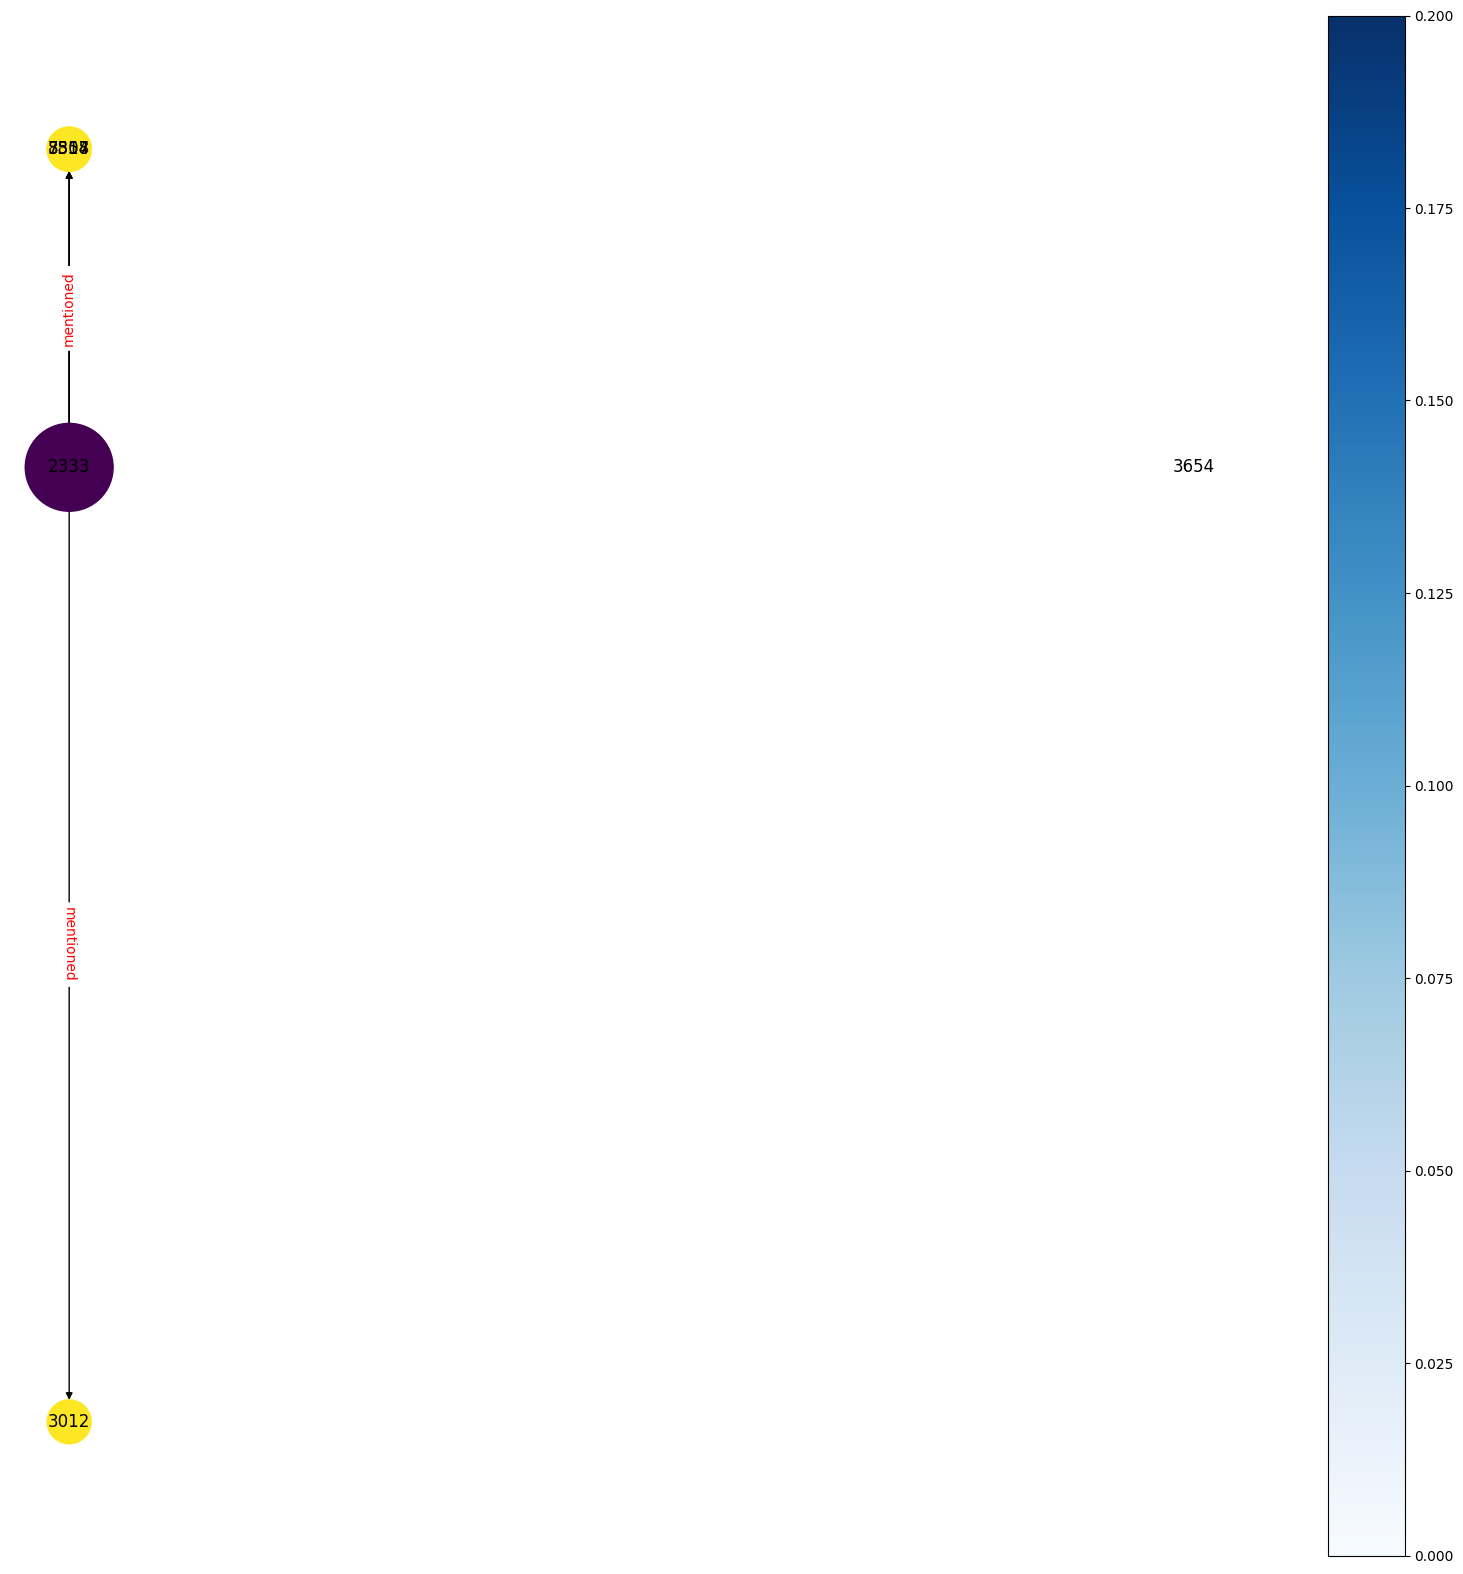

In [ ]:

# set node sizes based on degree centrality
node_sizes = [degree_centrality[node] * 5000 for node in G.nodes()]

# set node colors based on closeness centrality
node_colors = [closeness_centrality[node] for node in G.nodes()]

# set edge labels based on edge data
edge_labels = {(edge[0], edge[1]): edge[2] for edge in edge_data_new}

# visualize the graph using the spectral layout
fig = plt.figure(figsize=(20,20))
pos = nx.spectral_layout(G)
nx.draw(G, pos=pos, node_color=node_colors, node_size=node_sizes, with_labels=True, font_size=12, ax=plt.gca())

# add edge labels
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_size=10, font_color='red')

# add a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm._A = []
plt.colorbar(sm)

plt.show()